In [9]:
"""
Python for Data Analysis 

Plotting and Visualization 
"""

%matplotlib notebook
# Financial Time Series 
import numpy as np 
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [26]:
import numpy as np 

data = np.arange(10)

plt.plot(data)

# Figures and Subsplots

fig = plt.figure()

# You cant make a plot of a blank figure. You have yo create one or more subplots using add_subplot 

ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.rand(50).cumsum(), 'k--')

# When issue plotting command lile plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the last figure and subplot creation. 
# The 'k--' is a style option instructing matplotlib to plot a black dashed line.
# The objects returned by fig.add_subplot here are axessubplots objects, 
# one which you can directly plot on the other empty plots by calling their instance method

_ = ax1.hist(np.random.rand(100),
             bins=20, color = 'k',
            alpha=0.3)

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

# Creating a figure with a grid of subplots is very common task, so matsplotlib includes a convenience method, plt.subplots
# that creates a new figure and returns a NumPy array containing the created subplots

fig , axes = plt.subplots(2, 2)

# Python subplot s options page 263

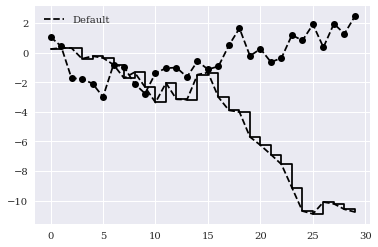

In [33]:
"""Colors, Markers, and Line Styles 

Matplotlib's main plot function accepts array of x y coordinates and optionally
a string abbreviation indication color and line style

ax.plot(x, y, 'g--')

This way of specifying color and line style in a string is provided as a convenience: in practice the same plot could also be 

ax.plot(x, y, linestyle='--', color='g')

Line plots can additionally have markers to highlight the actual data points

"""
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

# For line plots, you will notice that subsequent points are lineraly interpolated by default.
# This can be altered with the drawstyle option 

data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')

plt.plot(data, 'k-', drawstyle='steps-post')

plt.legend(loc ='best')

In [ ]:
"""
# Ticks,Labels,and Legends 

* Called with no argumetns returns the current parameter value(plt.xlim()) returns the current 

"""
